In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('Churn_Modelling.csv')

In [18]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [19]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [20]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [21]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [22]:
cols = ('CustomerId','CreditScore','Age', 'Tenure','NumOfProducts', 'HasCrCard',
       'IsActiveMember','Exited')

for col in cols:
    df[col]=df[col].astype(float)

In [23]:
df.dtypes

RowNumber            int64
CustomerId         float64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited             float64
dtype: object

In [24]:

def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5 * IQR
    outlier_mask = (column < Q1 - threshold) | (column > Q3 + threshold)
    return column[~outlier_mask]


In [25]:
numeric_col = ('CustomerId','CreditScore','Age', 'Tenure','NumOfProducts', 'HasCrCard','IsActiveMember','Exited','Balance','EstimatedSalary')

for cols in numeric_col:
    df[col]=remove_outliers(df[col])

<Axes: >

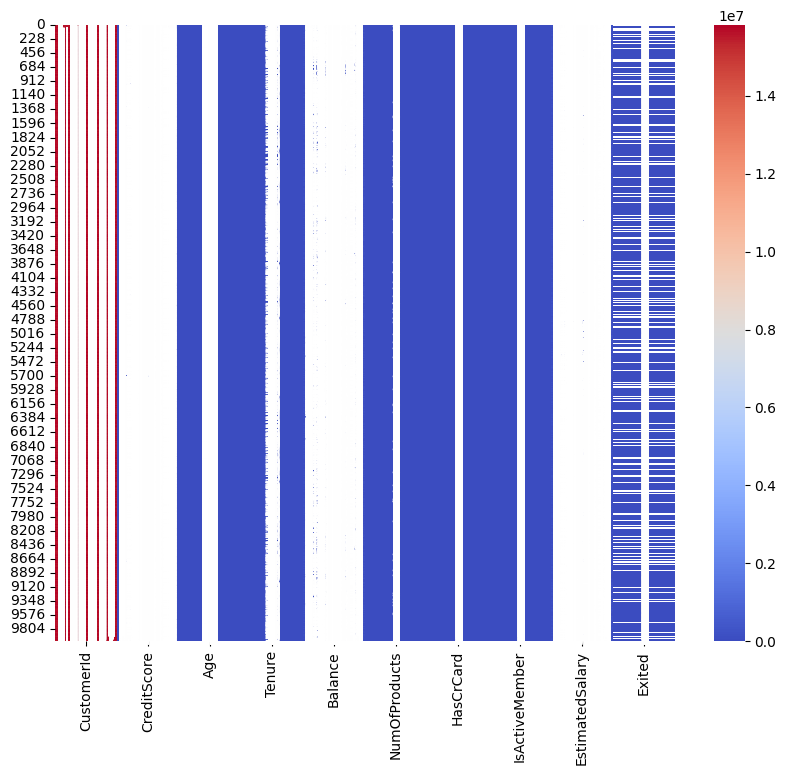

In [26]:
plt.figure(figsize=(10,8))

numeric_df = df.select_dtypes(include=['float'])
sns.heatmap(numeric_df, cmap='coolwarm', annot=True)

<Axes: xlabel='EstimatedSalary', ylabel='CreditScore'>

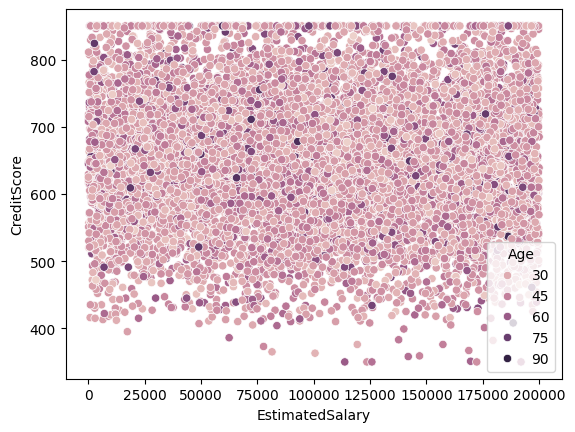

In [29]:
sns.scatterplot(df, x='EstimatedSalary', y='CreditScore', hue='Age')

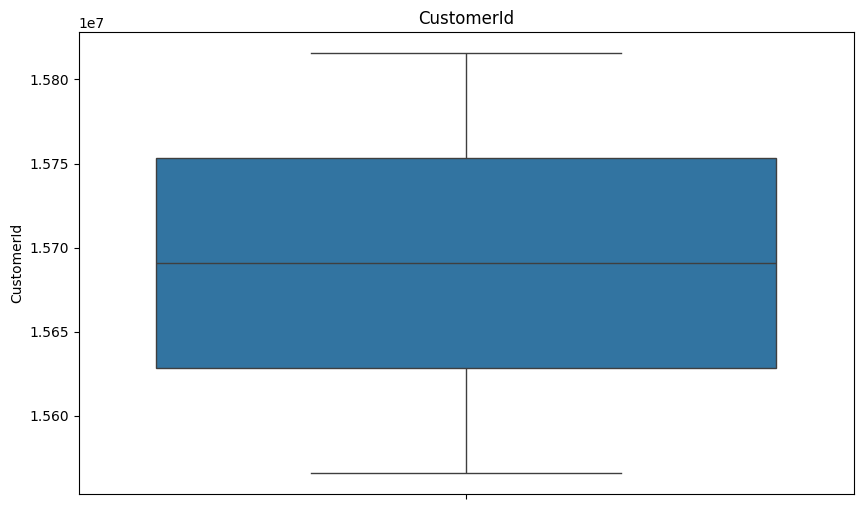

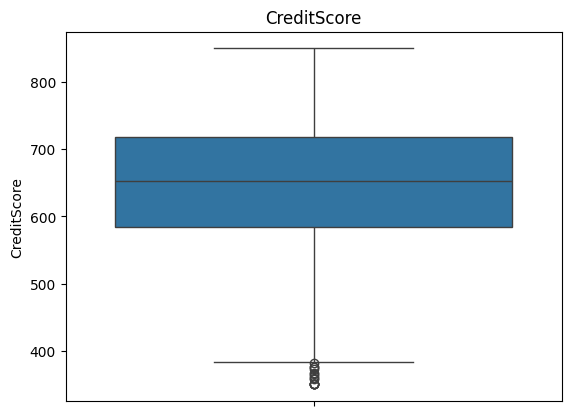

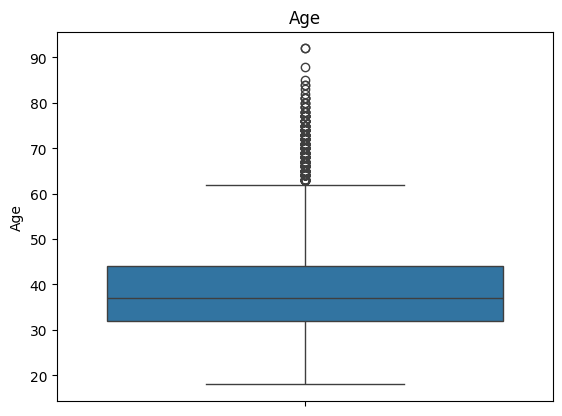

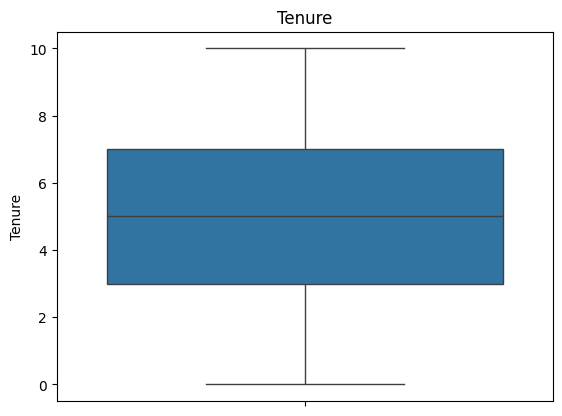

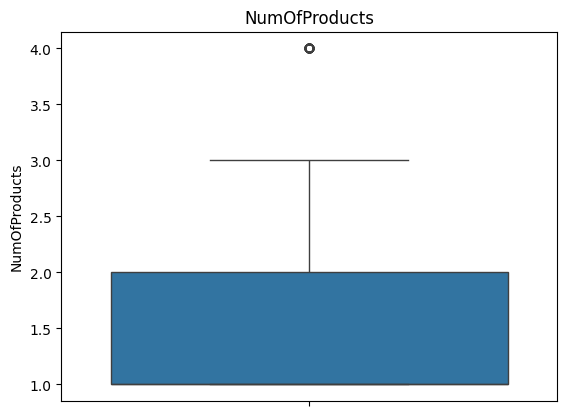

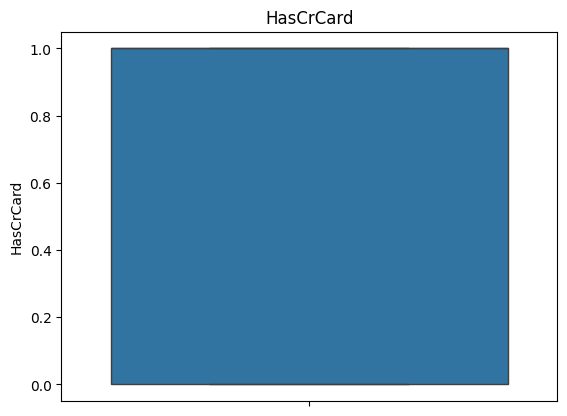

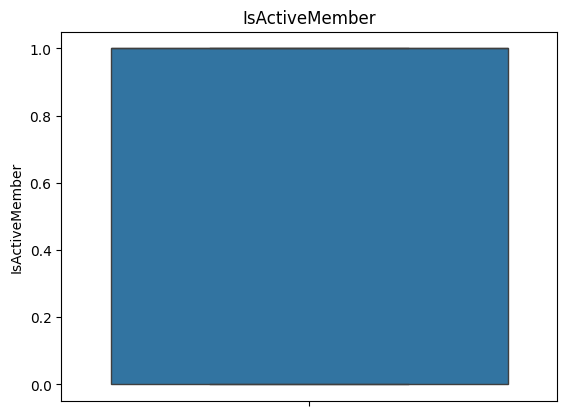

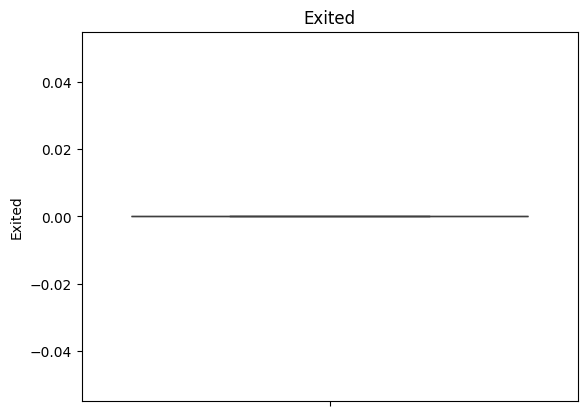

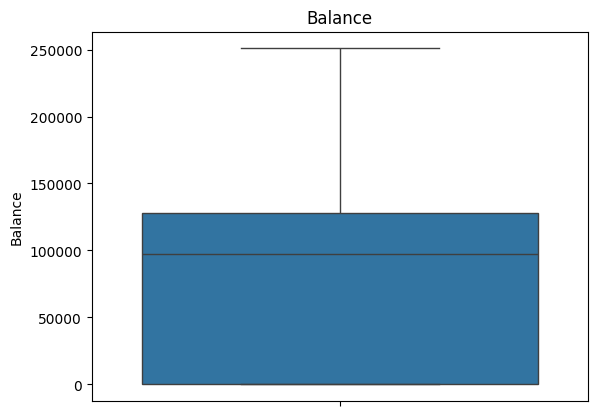

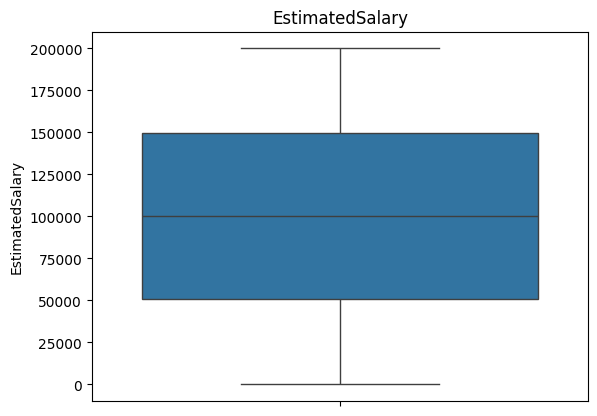

In [30]:
plt.figure(figsize=(10,6))
for col in numeric_col:
    sns.boxplot(data=df[col])
    plt.title(col)
    plt.show()

<Figure size 1000x1600 with 0 Axes>

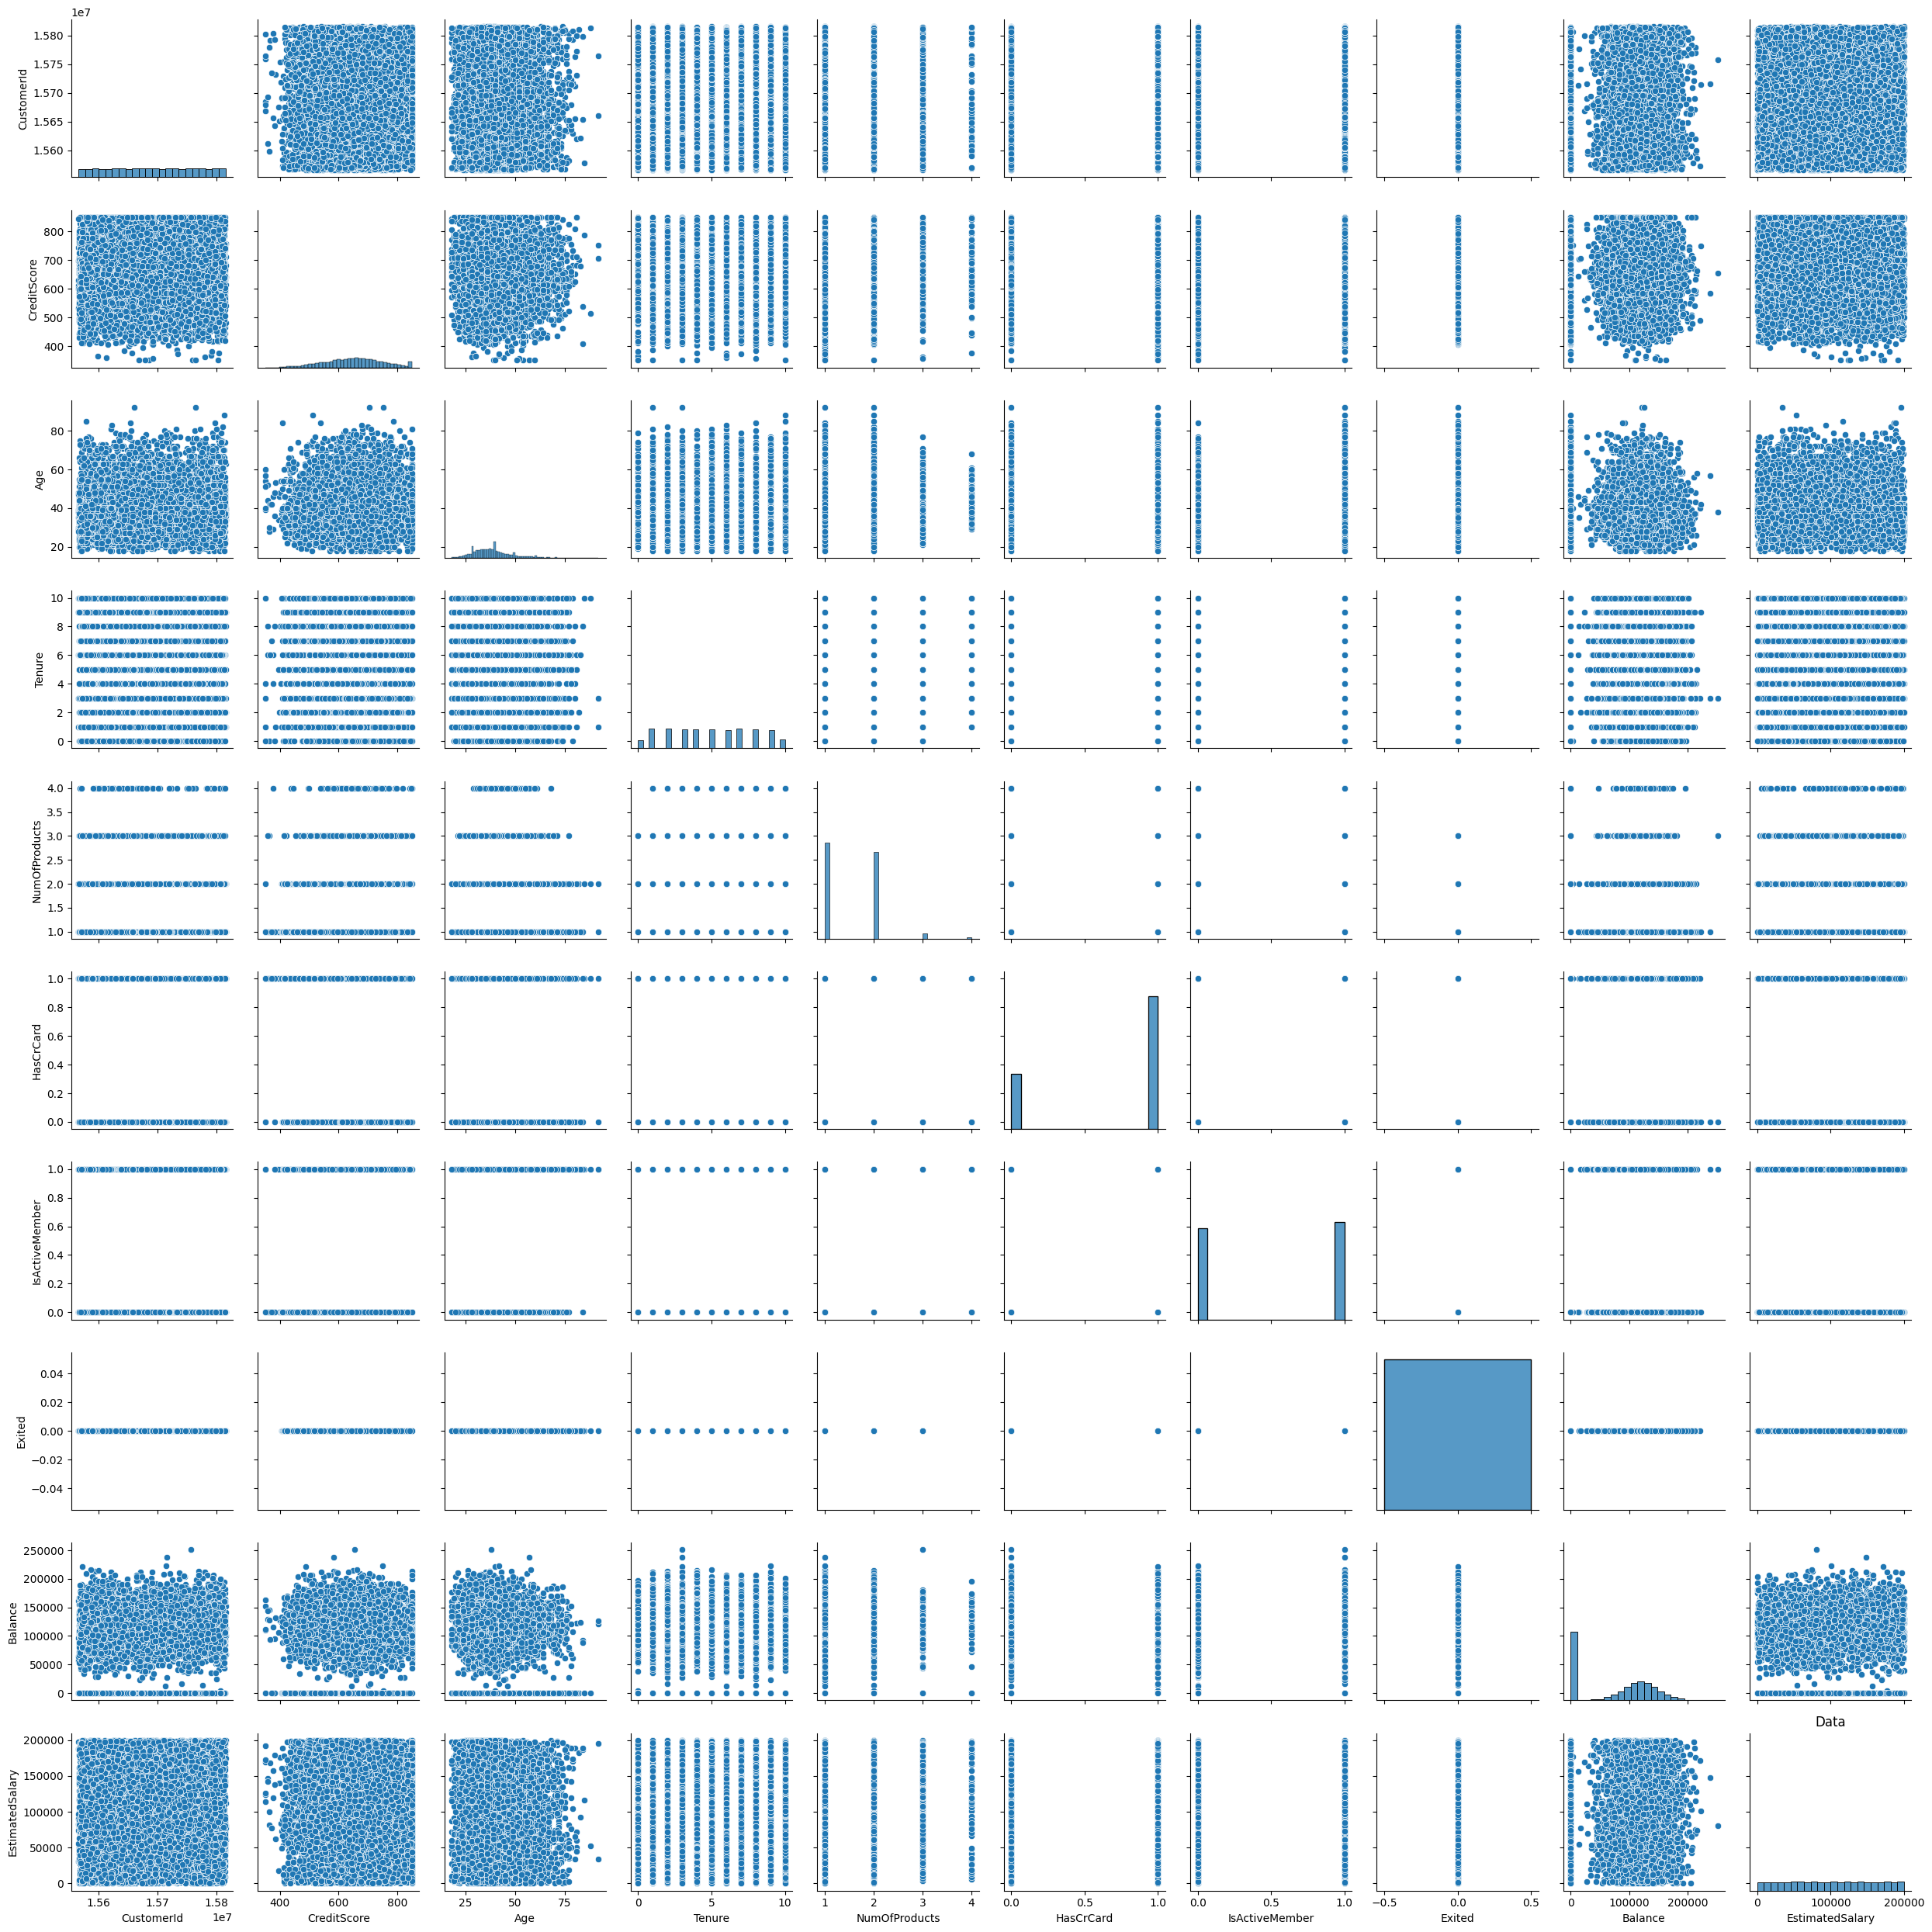

In [31]:
numeric_col = df[['CustomerId','CreditScore','Age', 'Tenure','NumOfProducts', 'HasCrCard','IsActiveMember','Exited','Balance','EstimatedSalary']]

plt.figure(figsize=(10,16))
sns.pairplot(numeric_col)
plt.title("Data")
plt.tight_layout()

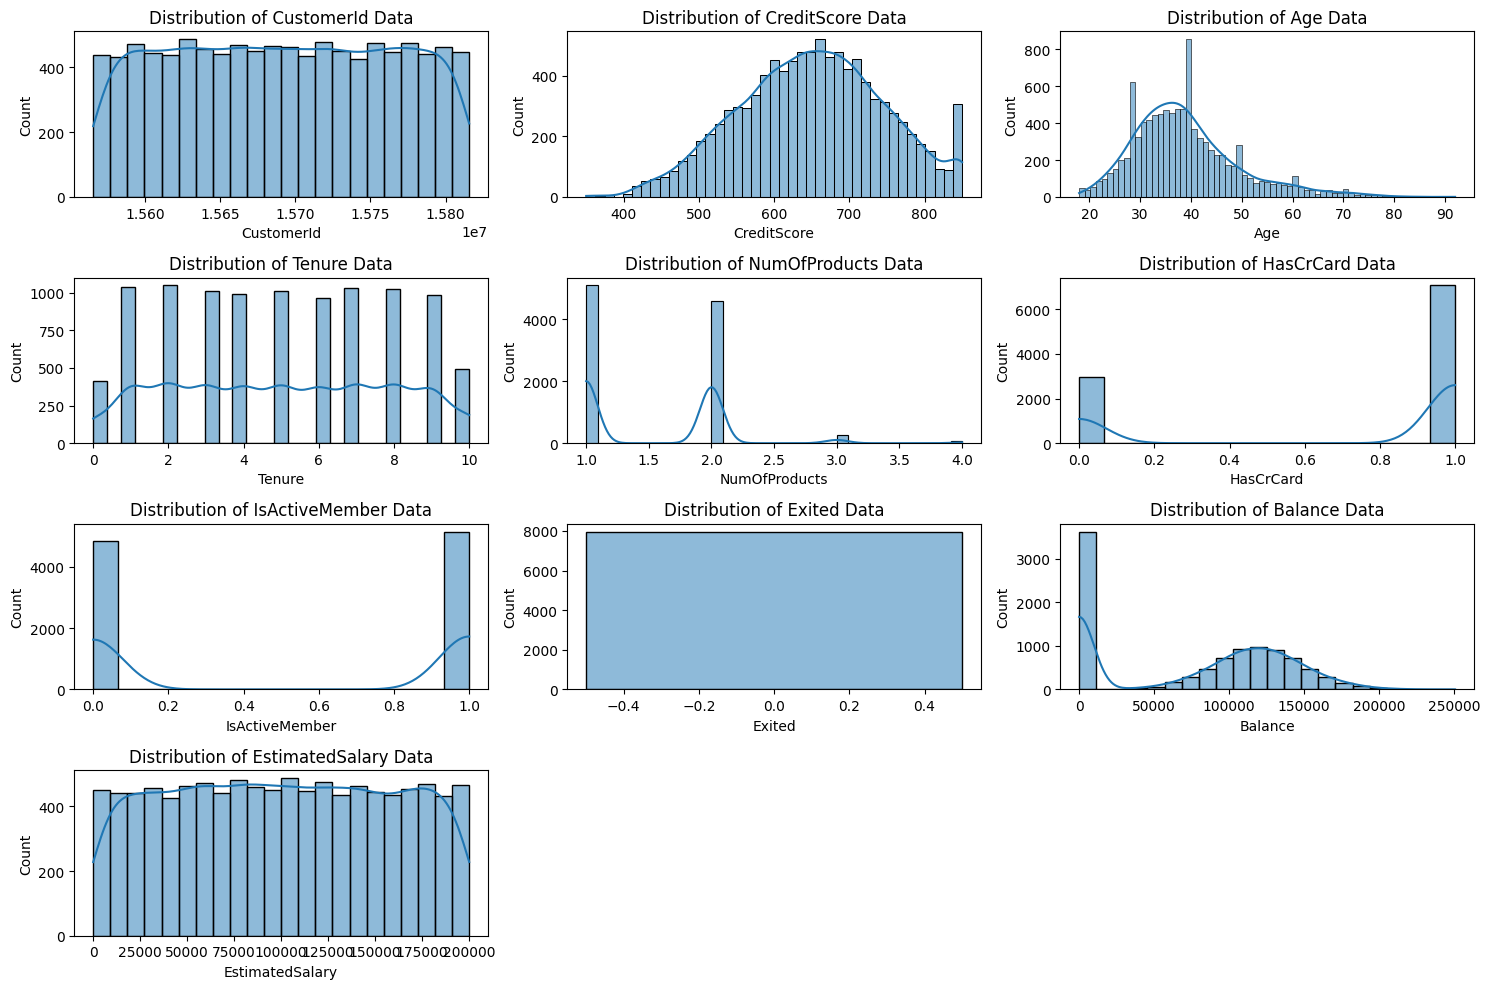

In [32]:
plt.figure(figsize=(15,10))
for i,col in enumerate(numeric_col.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [33]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [50]:
x = df[['CreditScore','Age', 'Tenure','NumOfProducts', 'HasCrCard','IsActiveMember','Balance','EstimatedSalary']]
y = df.Exited

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 8), (2000, 8), (8000,), (2000,))

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()

In [53]:
x_train_scaled =scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [54]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [55]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 8), (2000, 8), (8000, 1), (2000, 1))

In [56]:
rf_model = RandomForestClassifier
rf_model.fit(x_train_scaled, y_train)


y_pred = rf_model.predict(x_test_scaled)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))


AttributeError: 'numpy.ndarray' object has no attribute '_validate_params'

In [57]:
model=LogisticRegression()
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

accuracy=accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)


C:\Users\aryaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Input y contains NaN.